In [ ]:
# Import modules and packages
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from time import time

import math
import seaborn as sns
import datetime as dt
from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

%matplotlib inline

In [ ]:
#Importing Training Set
df = pd.read_csv('Train.csv')
#print(df[DATETIME])
df = df[['DATETIME', ' L_T1']]
df['DATETIME'] = pd.to_datetime(df['DATETIME'])
#print(df['DATETIME'][4177:6266])

dataset_train = pd.read_csv('Train.csv')
dataset_test = pd.read_csv('Test.csv')

#Separate dates for future plotting
train_dates = pd.to_datetime(dataset_train['DATETIME'])
test_dates = pd.to_datetime(dataset_test['DATETIME'])
#print(train_dates)

In [ ]:
# Select features (columns) to be involved intro training and predictions
cols = list(dataset_train)[4:5]

# Extract dates (will be used in visualization)
datelist_train = list(dataset_train['DATETIME'])
datelist_train = [dt.datetime.strptime(date, '%d/%m/%y %H').date() for date in datelist_train]
#print(datelist_train)
#print(dataset_train)
print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

Training set shape == (6266, 41)
All timestamps == 6266
Featured selected: [' L_T4']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x7f215cf936d0> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x7f215bebd690> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x7f215be68cd0> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-

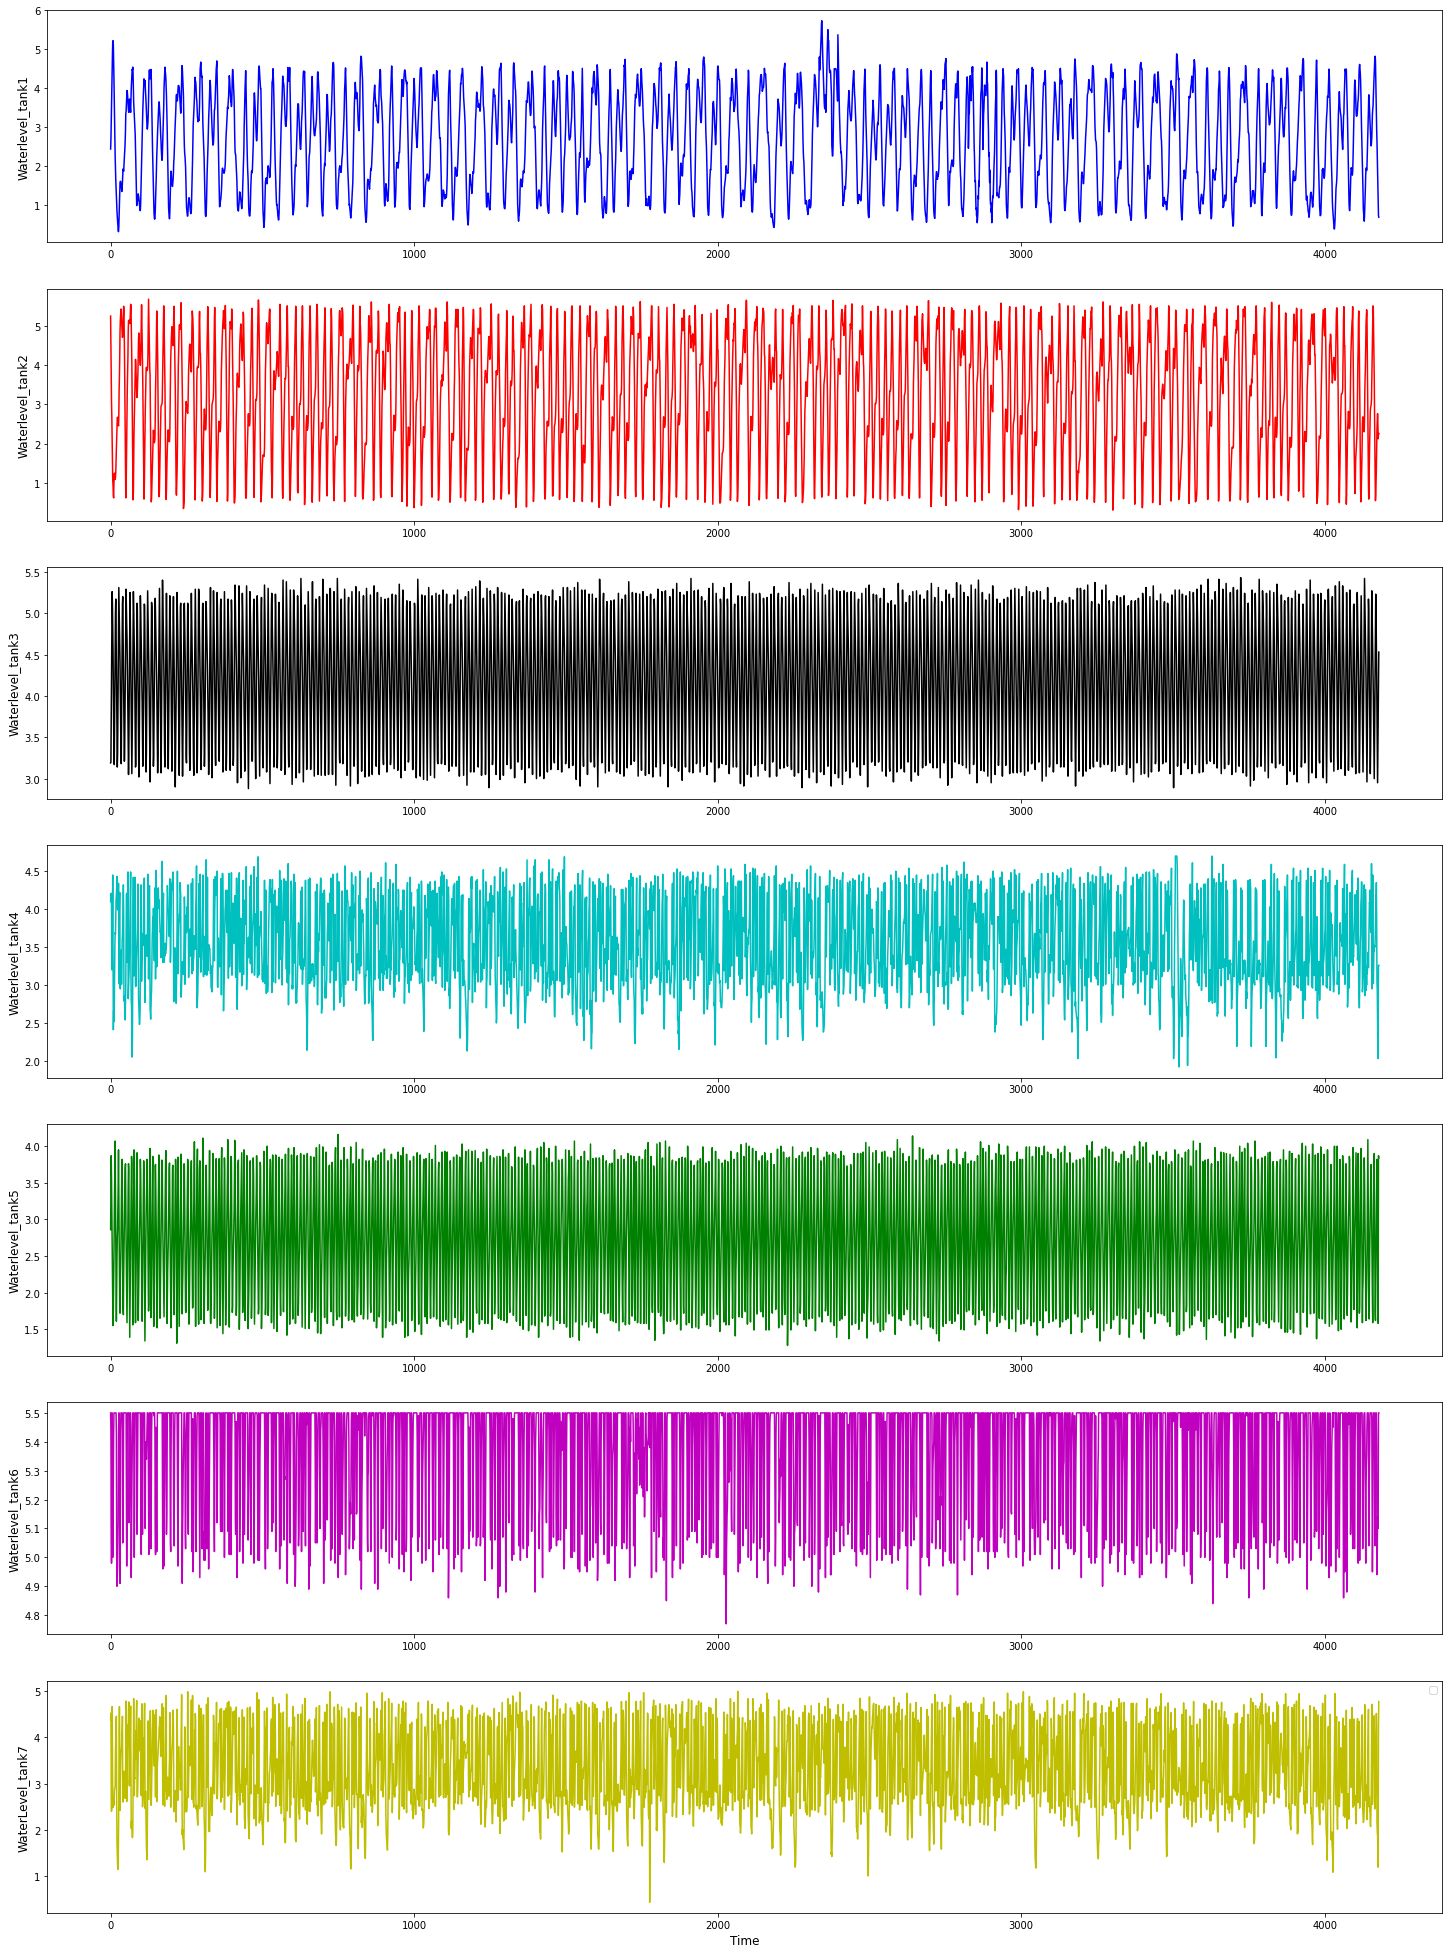

In [ ]:
# print(dataset_train)
from pylab import rcParams
rcParams['figure.figsize'] = 25, 35

START_DATE_FOR_PLOTTING = '2000-1-1'

figure, (ax1, ax2, ax3, ax4, ax5, ax6, ax7)= plt.subplots(7,1)

Tank1=ax1.plot(dataset_train.loc[:4178].index, dataset_train.loc[:4178][' L_T1'], color='b', label='L_T1')

Tank2=ax2.plot(dataset_train.loc[:4178].index, dataset_train.loc[:4178][' L_T2'], color='r', label='L_T2')

Tank3=ax3.plot(dataset_train.loc[:4178].index, dataset_train.loc[:4178][' L_T3'], color='k', label='L_T3')

Tank4=ax4.plot(dataset_train.loc[:4178].index, dataset_train.loc[:4178][' L_T4'], color='c', label='L_T4')

Tank5=ax5.plot(dataset_train.loc[:4178].index, dataset_train.loc[:4178][' L_T5'], color='g', label='L_T5')
Tank6=ax6.plot(dataset_train.loc[:4178].index, dataset_train.loc[:4178][' L_T6'], color='m', label='L_T6')
Tank7=ax7.plot(dataset_train.loc[:4178].index, dataset_train.loc[:4178][' L_T7'], color='y', label='L_T7')


plt.legend([ax1, ax2, ax3, ax4, ax5, ax6, ax7], ["Waterlevel_tank1", "Waterlevel_tank2", "Waterlevel_tank3",
                                                 "Waterlevel_tank4","Waterlevel_tank5", "Waterlevel_tank6", "Waterlevel_tank7"])
ax7.set_xlabel('Time', family='Arial', fontsize=12)

ax1.set_ylabel('Waterlevel_tank1', family='Arial', fontsize=12)
ax2.set_ylabel('Waterlevel_tank2', family='Arial', fontsize=12)
ax3.set_ylabel('Waterlevel_tank3', family='Arial', fontsize=12)
ax4.set_ylabel('Waterlevel_tank4', family='Arial', fontsize=12)
ax5.set_ylabel('Waterlevel_tank5', family='Arial', fontsize=12)
ax6.set_ylabel('Waterlevel_tank6', family='Arial', fontsize=12)
ax7.set_ylabel('WaterLevel_tank7', family='Arial', fontsize=12)

plt.savefig('Input-dataset7.png', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
dataset = dataset_train[cols].astype(str)
print(len(dataset))

6266


In [ ]:
dataset1 = dataset_train[cols].astype(str)
print(len(dataset1))
for i in cols:
    for j in range(0, len(dataset1)):
        dataset[i][j] = dataset1[i][j].replace(',', '')

     
    
dataset_train = dataset[:4177].astype(float)
dataset_test = dataset[4177:].astype(float)

dataset_T = dataset.astype(float).values   
# Using multiple features (predictors)
training_set = dataset_train.values
testing_set = dataset_test.values

print('Shape of training set == {}.'.format(training_set.shape))
print('Shape of testing set == {}.'.format(testing_set.shape))

print(testing_set)

6266
Shape of training set == (4177, 1).
Shape of testing set == (2089, 1).
[[3.26]
 [3.26]
 [3.41]
 ...
 [2.3 ]
 [2.35]
 [2.44]]


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled =sc.fit_transform(testing_set)

print(dataset_T)
sc_predict = MinMaxScaler(feature_range=(0, 1))
sc_predict.fit_transform(dataset_T[:, 0:])

[[4.1 ]
 [4.18]
 [4.21]
 ...
 [2.3 ]
 [2.35]
 [2.44]]


array([[0.78417266],
       [0.81294964],
       [0.82374101],
       ...,
       [0.13669065],
       [0.15467626],
       [0.18705036]])

In [ ]:
seq_size =24
print(len(training_set_scaled))

4177


In [ ]:
trainX, trainY = to_sequence(training_set_scaled, training_set_scaled, seq_size)
testX, testY = to_sequence(test_set_scaled, test_set_scaled, seq_size)

In [ ]:
#trainY = np.reshape(trainY, (trainY.shape[0], 1, 1))
#testY = np.reshape(testY, (testY.shape[0], 1, 7))
print(trainX.shape)
print(trainY.shape)
print(testY.shape)
#print(trainX)
#print(trainY)


(4153, 24, 1)
(4153, 1)
(2065, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
from keras.layers import LSTM, GRU#, Conv1D, Conv1DTranspose
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from keras import regularizers

In [ ]:
#model = Sequential()
#model.add(Conv1D(filters=128, kernel_size=7, padding="same", strides=2, activation="relu",
                 #input_shape=(trainX.shape[1], trainX.shape[2])))

#model.add(Dropout(rate=0.2))

#model.add(Conv1D(filters=64, kernel_size=7, padding="same", strides=2, activation="relu"))

#model.add(Conv1DTranspose(filters=64, kernel_size=7, padding="same", strides=2, activation="relu"))

#model.add(Dropout(rate=0.2))

#model.add(Conv1DTranspose(filters=128, kernel_size=7, padding="same", strides=2, activation="relu"))

#model.add(Conv1DTranspose(filters=7, kernel_size=7, padding="same"))

#model.compile(optimizer=Adam(learning_rate=0.004), loss="mean_absolute_error")
#model.summary()

In [ ]:
## Initializing the Neural Network based on LSTM
model = Sequential()
model.add(LSTM(units=64, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.2))
model.add(RepeatVector(trainX.shape[1]))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(trainX.shape[2])))

model.compile(optimizer =Adam(learning_rate=0.004), loss='mean_absolute_error')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
repeat_vector_4 (RepeatVecto (None, 24, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 24, 64)            33024     
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 64)            0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 24, 1)             65        
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
__________________________________________________

In [ ]:
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=400, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=15, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')
history = model.fit(trainX, trainX, shuffle=False, epochs=500, callbacks=[es, rlr, mcp, tb], validation_split=0.30, batch_size=32, verbose=1)


Epoch 1/500
91/91 [==============================] - 6s 33ms/step - loss: 0.1778 - val_loss: 0.1791

Epoch 00001: val_loss improved from inf to 0.17909, saving model to weights.h5
Epoch 2/500
91/91 [==============================] - 2s 18ms/step - loss: 0.1642 - val_loss: 0.1692

Epoch 00002: val_loss improved from 0.17909 to 0.16924, saving model to weights.h5
Epoch 3/500
91/91 [==============================] - 2s 18ms/step - loss: 0.1609 - val_loss: 0.1681

Epoch 00003: val_loss improved from 0.16924 to 0.16807, saving model to weights.h5
Epoch 4/500
91/91 [==============================] - 2s 18ms/step - loss: 0.1580 - val_loss: 0.1678

Epoch 00004: val_loss improved from 0.16807 to 0.16781, saving model to weights.h5
Epoch 5/500
91/91 [==============================] - 2s 18ms/step - loss: 0.1562 - val_loss: 0.1749

Epoch 00005: val_loss did not improve from 0.16781
Epoch 6/500
91/91 [==============================] - 2s 18ms/step - loss: 0.1556 - val_loss: 0.1549

Epoch 00006: va

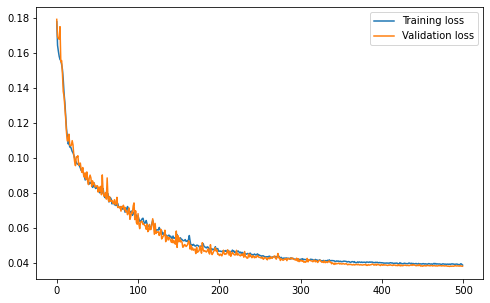

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
model.evaluate(testX, testX)
###########################
#Anomaly is where reconstruction error is large.
#We can define this value beyond which we call anomaly.
#Let us look at MAE in training prediction

65/65 [==============================] - 0s 6ms/step - loss: 0.0382


0.038177743554115295

In [ ]:
def rm_sequence(x):
  X_val = []
  for i in range(len(x)):
    X_val.append(x[i, 0:1])
  return np.array(X_val)

In [ ]:
# Get train MAE loss.
x_train_pred_sc = model.predict(trainX)
x_test_pred_sc = model.predict(testX)
print(trainX.shape)
print(x_test_pred_sc.shape)


train_pred_desc = rm_sequence(x_train_pred_sc)
train_pred_desc = np.reshape(train_pred_desc, (train_pred_desc.shape[0], train_pred_desc.shape[1],))

test_pred_desc = rm_sequence(x_test_pred_sc)
test_pred_desc = np.reshape(test_pred_desc, (test_pred_desc.shape[0], test_pred_desc.shape[1],))
print(train_pred_desc.shape)
print(test_pred_desc.shape)

(4153, 24, 1)
(2065, 24, 1)
(4153, 1)
(2065, 1)


In [ ]:
#pred_train_sc = np.reshape(x_train_pred_sc, (x_train_pred_sc.shape[0], x_train_pred_sc.shape[1],))
#pred_test_sc = np.reshape(x_test_pred_sc, (x_test_pred_sc.shape[0], x_test_pred_sc.shape[1],))

trainX_desecq = rm_sequence(trainX)
trainX_desecq = np.reshape(trainX_desecq, (trainX_desecq.shape[0], trainX_desecq.shape[1],))

testX_desecq = rm_sequence(testX)
testX_desecq = np.reshape(testX_desecq, (testX_desecq.shape[0], testX_desecq.shape[1],))

print(trainX_desecq.shape)
print(testX_desecq.shape)


(4153, 1)
(2065, 1)


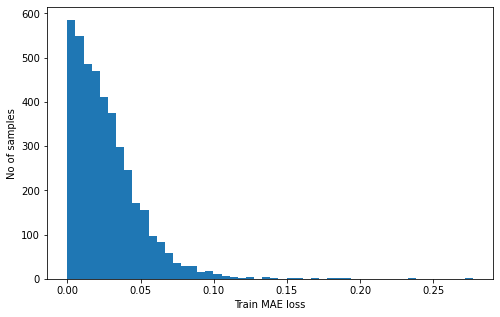

Reconstruction error threshold:  0.24945552349090577


In [ ]:
train_mae_loss = np.mean(np.abs(train_pred_desc - trainX_desecq), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = (0.90)*np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

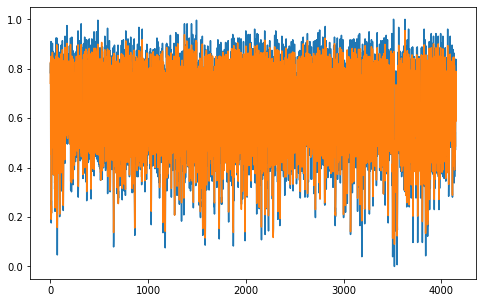

In [ ]:
plt.plot(trainX_desecq)
plt.plot(train_pred_desc)
plt.show()

In [ ]:
x_train_pred= sc_predict.inverse_transform(train_pred_desc)
x_test_pred= sc_predict.inverse_transform(test_pred_desc) 

trainX_desecq_org =sc_predict.inverse_transform(trainX_desecq)
testX_desecq_org =sc_predict.inverse_transform(testX_desecq) 

#print(x_test_pred[:, 0:1])
print(testing_set[seq_size:])

[[3.64]
 [4.14]
 [4.56]
 ...
 [2.3 ]
 [2.35]
 [2.44]]


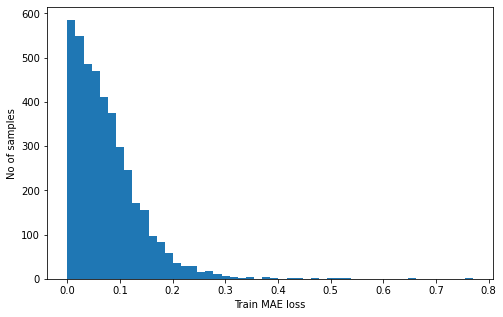

Reconstruction error threshold:  0.6934863853454591


In [ ]:
train_mae_loss = np.mean(np.abs(x_train_pred - trainX_desecq_org), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = (0.90)*np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

(2065, 1)
Reconstruction error threshold:  0.40711759567260775


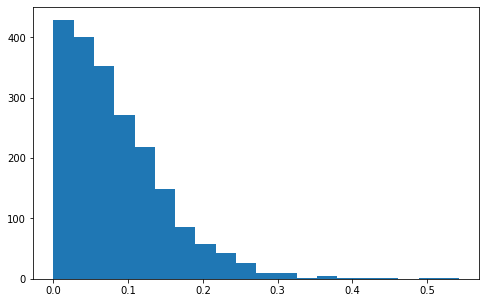

In [ ]:
testMAE = np.mean(np.abs(x_test_pred - testX_desecq_org), axis=1)
print(x_test_pred.shape)
plt.hist(testMAE, bins=20)
# Get reconstruction loss threshold.
threshold = (0.75)*np.max(testMAE)
print("Reconstruction error threshold: ", threshold)

In [ ]:
date = []
for i in range(len(x_test_pred)):
  date.append(i)


In [ ]:
#Capture all details in a DataFrame for easy plotting
anomaly_df = pd.DataFrame(testing_set[seq_size:])
anomaly_df['Date'] = pd.DataFrame(date)
#anomaly_df['predictionT1'] = pd.DataFrame(x_test_pred[:, 0])
#anomaly_df['predictionT2'] = pd.DataFrame(x_test_pred[:, 1])
#anomaly_df['predictionT3'] = pd.DataFrame(x_test_pred[:, 2])
anomaly_df['predictionT4'] = pd.DataFrame(x_test_pred)
#anomaly_df['predictionT5'] = pd.DataFrame(x_test_pred[:, 4])
#anomaly_df['predictionT6'] = pd.DataFrame(x_test_pred[:, 5])
#anomaly_df['predictionT7'] = pd.DataFrame(x_test_pred[:, 6])

anomaly_df['testMAE'] = testMAE
anomaly_df['threshold'] = threshold
anomaly_df['anomaly'] = anomaly_df['testMAE'] > anomaly_df['threshold']

anomaly_df['waterlevel'] = testing_set[seq_size:]
print(anomaly_df)

         0  Date  predictionT4   testMAE  threshold  anomaly  waterlevel
0     3.64     0      3.216403  0.009355   0.407118    False        3.64
1     4.14     1      3.185956  0.039801   0.407118    False        4.14
2     4.56     2      3.412624  0.028912   0.407118    False        4.56
3     3.54     3      3.946933  0.026476   0.407118    False        3.54
4     3.30     4      4.227390  0.061928   0.407118    False        3.30
...    ...   ...           ...       ...        ...      ...         ...
2060  2.95  2060      3.627299  0.454193   0.407118     True        2.95
2061  2.84  2061      3.557280  0.500007   0.407118     True        2.84
2062  2.30  2062      3.389490  0.542823   0.407118     True        2.30
2063  2.35  2063      3.338631  0.228707   0.407118    False        2.35
2064  2.44  2064      3.341969  0.053030   0.407118    False        2.44

[2065 rows x 7 columns]


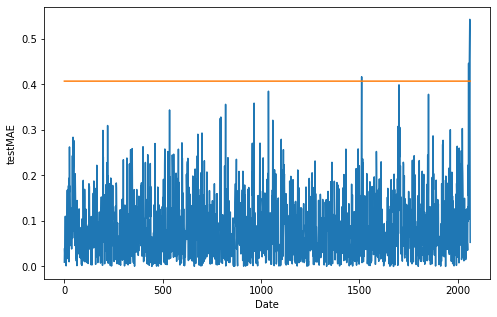

In [ ]:
#Plot testMAE vs max_trainMAE
sns.lineplot(x=anomaly_df['Date'], y=anomaly_df['testMAE'])
sns.lineplot(x=anomaly_df['Date'], y=anomaly_df['threshold'])

In [ ]:
anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]
print(anomalies)

         0  Date  predictionT4   testMAE  threshold  anomaly  waterlevel
1512  2.83  1512      2.736947  0.416795   0.407118     True        2.83
2056  2.11  2056      4.074702  0.446283   0.407118     True        2.11
2060  2.95  2060      3.627299  0.454193   0.407118     True        2.95
2061  2.84  2061      3.557280  0.500007   0.407118     True        2.84
2062  2.30  2062      3.389490  0.542823   0.407118     True        2.30


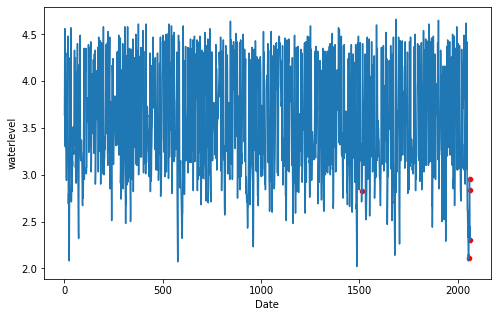

In [ ]:
#Plot anomalies
sns.lineplot(x=anomaly_df['Date'], y=anomaly_df['waterlevel'])
sns.scatterplot(x=anomalies['Date'], y=anomalies['waterlevel'], color='r')